In [2]:
import tiledb
import numpy as np 
import pdb 
datapath="/mnt/data/encode_dnase_tiledb/encode/dnase/ENCSR000EMT.chr1"
data=tiledb.DenseArray(datapath,mode='r')
fc_bigwig=data[:]['fc_bigwig']
idr_peak=data[:]['idr_peak']
#overlap_peak=data[:]['overlap_peak']
#pval_bigwig=data[:]['pval_bigwig']
#ambig_peak=data[:]['ambig_peak']
#ambig_peak=data[:]['count_bigwig_plus_5p']
#ambig_peak=data[:]['count_bigwig_minus_5p']
#print(np.nanmax(overlap_peak))
print(np.nanmax(idr_peak))
#print(np.nanmax(ambig_peak))
#print(np.nanmax(pval_bigwig))
print(np.nanmax(fc_bigwig))



2
54.09637


In [4]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt

In [5]:
idr_narrowPeak=pd.read_csv("/oak/stanford/groups/akundaje/projects/atlas/dnase_processed/atac/13da5ebe-0941-4855-8599-40bbcc5c58b4/call-reproducibility_idr/execution/optimal_peak.narrowPeak.gz",header=None,sep='\t')
#idr_narrowPeak_uniq=pd.read_csv("",header=None,sep='\t')

In [6]:
summits=np.where(idr_peak==2)

In [20]:
len(summits[0])

18058

In [21]:
idr_narrowPeak.head()

,0,1,2,3,4,5,6,7,8,9
0,chr7,145997303,145997468,.,1000,.,38.17794,139.93965,131.92563,83
1,chr12,41363606,41363762,.,1000,.,35.06702,139.58408,131.63699,75
2,chrY,4344741,4344887,.,1000,.,39.01298,131.53731,124.12894,73
3,chrX,27809382,27809604,.,1000,.,33.34859,130.88385,123.52303,122
4,chrY,9141858,9141998,.,1000,.,37.33500,124.25579,117.05468,68


In [22]:
cur_chrom=idr_narrowPeak[idr_narrowPeak[0]=="chr1"]
expected_summits=cur_chrom[1]+cur_chrom[9]
len(expected_summits)

9860

In [23]:
9860*2

19720

In [34]:
print(summits[0][-10:-1])

[248906121 248906218 248906455 248906569 248906782 248924847 248925173
 248925281 248925389]


In [35]:
np.sort(np.asarray(expected_summits))[-10:-1]

array([248873883, 248873996, 248874169, 248874372, 248905951, 248906121,
       248906218, 248906455, 248906569])

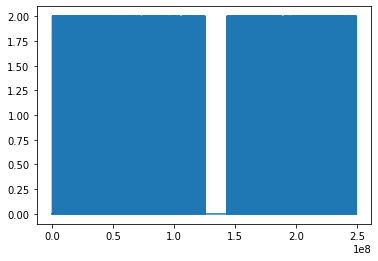

In [11]:
plt.plot(idr_peak)

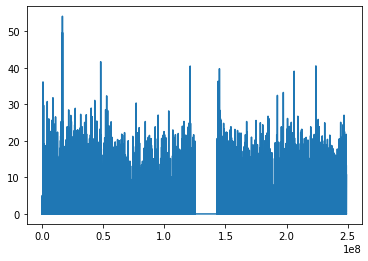

In [31]:
plt.plot(fc_bigwig)

In [38]:
len(np.where(idr_peak>=1)[0])

3683317

In [39]:
coverage=sum(idr_narrowPeak[2]-idr_narrowPeak[1])

In [40]:
coverage

65055097

In [32]:
#check the bigwig